# Центральная предельная теорема своими руками
# на основе $\beta$ - распределения


### Пусть распределение случайной величины $X$ задаётся плотностью вероятности $f_{X}$ , имеющей вид: $f_{X}(x) = \frac{1}{B(\alpha,\beta)} x^{\alpha - 1} (1-x)^{\beta - 1}$ , где 
$ \alpha , \beta > 0 \\ B(\alpha,\beta) = \int \limits_{0}^{1} x^{\alpha - 1} (1-x)^{\beta - 1} - бета-функция $ 

### Математическое ожидание и дисперсия случайной величины X , имеющей бета-распределение, имеют вид: 
$E[X] = \frac{\alpha}{\alpha + \beta} \\                   
D[X] = \frac{\alpha\beta}{(\alpha + \beta + 1)(\alpha + \beta)^{2}} $

### ссылка в Википедии : https://ru.wikipedia.org/wiki/Бета-распределение

In [1]:
#подключение необходимых библиотек
import numpy as np
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# задание начальных параметров и
# вычисление параметров нормальных распределений, аппроксимирующих выборочные средние при различных n
alpha , beta , dim = 0.5 , 0.5 , 1000
n = {1 : 3 , 2: 6 , 3: 15, 4: 33}
mx = alpha/(alpha+beta) #мат ожидание
dx = alpha*beta/((alpha+beta+1)*((alpha+beta)**2)) # дисперсия
std = np.sqrt(dx) # стандартное отклонение
print u'Теоритические мат. ожидание и дисперсия  : %s , %s1' % (mx,dx)

Теоритические мат. ожидание и дисперсия  : 0.5 , 0.1251


In [3]:
# функции нахождения выборочного среднего и выборочной дисперсии
def mymean(x):
    s = 0
    for i in x:
        s += i
    return s/len(x)

def mydisp(x,xmean):
    s = 0
    for i in x:
        s += (i-mymean(x)) ** 2
    sig = np.sqrt(s/(len(x)-1))
    return sig

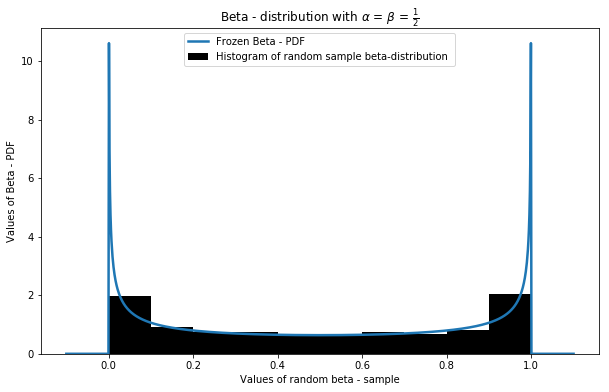

In [4]:
# генерация выборки объема 1000 при альфа = бета = 0.5
# построение гисторграммы и теоритической плотности вероятности
beta_rv = sts.beta(alpha,beta)
sample = beta_rv.rvs(dim)
x = np.linspace(-0.1,1.1,dim)
plt.figure(figsize= (10,6))
plt.title(r'Beta - distribution with $\alpha$ = $\beta$ = $\frac{1}{2}$')
plt.plot(x, beta_rv.pdf(x), lw = 2.5, label = 'Frozen Beta - PDF' )
plt.hist(sample, normed = True, color = 'black',label = 'Histogram of random sample beta-distribution ')
plt.legend(loc = 'best')
#plt.ylim(0,3)
plt.ylabel('Values of Beta - PDF')
plt.xlabel('Values of random beta - sample')
plt.show()

In [5]:
def betasample(n,dim,beta_rv):        
        tmp = {}
        for keys in n:
            means = np.arange(dim,dtype=float)
            for i in range(dim):
                x = beta_rv.rvs(n.get(keys)) # генерация выборки объема n
                means[i] = mymean(x) # нахождение выборочного среднего этой выборки    
            meankey = r'$\bar X_%s$' % (keys)
            tmp[meankey] = means # добавление в словарь пары : выборочное среднее - значение
        sample = pd.DataFrame(tmp) # создание датафрейма из словаря
        mysample = sample.T
        return mysample 
            
                
                              

In [6]:
datasample = betasample(n,dim,beta_rv) 
datasample

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
$\bar X_1$,0.590856,0.409169,0.383579,0.020978,0.164480,0.981665,0.378931,0.350761,0.718409,0.619328,...,0.530520,0.781856,0.385614,0.690945,0.795001,0.351118,0.536684,0.189679,0.504727,0.247842
$\bar X_2$,0.649873,0.363676,0.392706,0.251265,0.714547,0.399661,0.391307,0.392955,0.591601,0.691208,...,0.614954,0.434503,0.444357,0.657647,0.412921,0.432858,0.569067,0.543194,0.373943,0.707048
$\bar X_3$,0.577758,0.538754,0.559254,0.505910,0.520079,0.604168,0.572662,0.588611,0.556579,0.448321,...,0.555892,0.505243,0.528716,0.623374,0.486057,0.418776,0.558356,0.363243,0.563443,0.543101
$\bar X_4$,0.495568,0.541175,0.412296,0.426634,0.527872,0.576639,0.453138,0.577086,0.391747,0.522332,...,0.496742,0.565603,0.486839,0.531796,0.432569,0.604725,0.539395,0.478845,0.619305,0.448717


In [9]:
# прорисовка гистограм распредения выборочных средних при различных n
# и графиков плотности соответсвующих нормальных распределений
def plotting(data,mx,dx,n):
        norm_rvm = sts.norm(loc = mx, scale = dx)       
        x=np.linspace(0,1,dim)
        fig, ax = plt.subplots(1,4, figsize = (15,5))
        pdfx = norm_rvm.pdf(x)         
        for i in range(4):
                    ax[i].plot(x,pdfx)
                    ax[i].hist(data.values[i],normed = True)
                    ax[i].legend(('Normal PDF','Average distribution'), loc = 'best')
                    mystr = data.index[i] + '( n = %s)' % n.get(i+1)
                    ax[i].set_title(mystr)
                    ax[i].set_ylabel('$F(X)$')
                    ax[i].set_xlabel('$x$')
                    ax[i].plot(mx,mx)
                
        fig.subplots_adjust( wspace = 0.5)
            
        

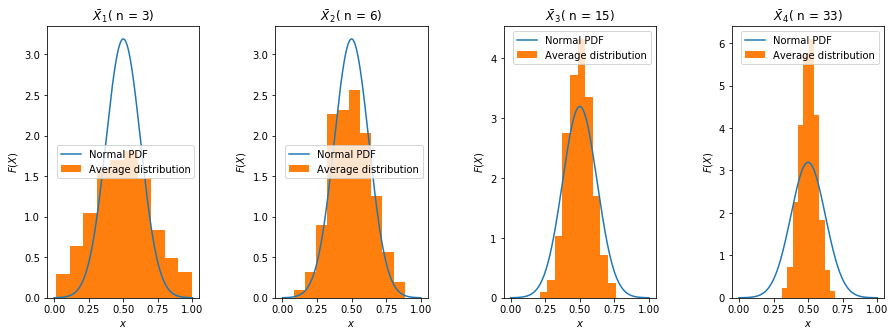

In [10]:
plotting(datasample,mx,dx,n)


#                                                   Вывод : 
## Распределение выборочных средних  достаточно    хорошо описывается нормальным распределением. Смотря на полученные графики видно, что  при увеличении объема выборок  распределение становится все более гладким и все более похожим на нормальное. То есть с ростом n точность нормальной аппроксимации увеличивается.